# A complete data analysis package:-

I have provided a Python file that includes many different sections and functions for handling and analyzing datasets and training models. This program works on two main tasks: the classification task and the regression task. I will briefly explain each section and function in the program:

### section One:
This section loads and imports the necessary Python libraries.

### Second Section:
This section defines and uses a GUI using Tkinter to select a CSV, Text, or xlsx file to analyze.

### Section Three:
This section reads the file specified from the previous step using the `read_dataset` function and displays the data of the read file.

### Fourth Section:
This section deals with data exploration, analyzes column types and data set size, finds duplicate records, and provides statistics and graphical visualizations for numerical and categorical columns.

### Fifth Section:
This section plots raw data visualizations with functions such as `plot_histograms`, `plot_box_plots`, `plot_scatter_plots` and `plot_correlation_heatmap`.

### Sixth Section:
This section deals with data processing, including handling of missing values, coding of categorical data, processing of outliers, and data standardization.

### Seventh Section:
This section trains and evaluates models using the `train_and_evaluate_model` function. The model used was determined based on the type of task (classification or regression) and the name of the model chosen.

### Section Eight:
This section plots the performance of the trained models using the `plot_classification_performance` and `plot_regression_performance` functions and displays the learning curve, the ROC curve, and the confusion and error matrix.

### The last section:
This section compares the performance of different models in the classification task and regression task and prints the results.

In [1]:
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#One stage: Definition of libraries
print("One stage: Definition of libraries were processed successfully........")
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Firstly: Download the required librarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
from tkinter import simpledialog
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error


One stage: Definition of libraries were processed successfully........


In [2]:
## Func1.Read data of any file
def read_dataset(file_path):
    # التحقق من نوع الملف
    if file_path.endswith(".csv"):
        data = pd.read_csv(file_path)
        print("CSV file uploaded successfully.")

    elif file_path.endswith(".txt"):
        data = pd.read_csv(file_path, sep="\t")  # قراءة ملف نصي مع فاصل مخصص
        print("txt file uploaded successfully.")

    elif file_path.endswith(".xlsx"):
        data = pd.read_excel(file_path)  # قراءة ملف نصي مع فاصل مخصص
        print("excel file uploaded successfully")
    else:
        print("The type is not supported.")
    return data

In [3]:
## Func2. Know the types of data
def infer_column_types(data):
    # إنشاء قاموس لتخزين أنواع البيانات في كل عمود
    data_types = {}

    # الحصول على الصف الأول من البيانات (الصف الأول يحتوي على البيانات الأولى في كل عمود)
    first_row = data.iloc[0]

    # التفحص عن أنواع البيانات في كل عمود
    for column_name, value in first_row.iteritems():
        data_type = type(value).__name__
        data_types[column_name] = data_type

    return data_types


In [4]:
## Func3. check_missing_values
def check_missing_values(dataset):
    # إنشاء قاموس لتخزين عدد القيم المفقودة في كل عمود
    missing_values = {}
    data = dataset
    # الحصول على عدد الصفوف الإجمالي في المجموعة
    total_rows = data.shape[0]

    # التفحص عن القيم المفقودة في كل عمود
    for column in data.columns:
        missing_count = total_rows - data[column].count()
        missing_values[column] = missing_count

    return missing_values


In [5]:
## Func4. get_dataset_shape
def get_dataset_shape(dataset):
    # استخدم الدالة len() لحساب عدد الصفوف
    row_count = len(dataset)

    # استخدم دالة len() مع أي صف من مجموعة البيانات لحساب عدد الأعمدة
    # افترض أن المجموعة تحتوي على صفوف وأن الأعمدة موجودة في أول صف
    column_count = len(dataset.iloc[0])

    return row_count, column_count


In [6]:
## Func5. count_unique_values
def count_unique_values(dataset):
    # إنشاء قاموس لتخزين عدد القيم الفريدة في كل عمود
    unique_values_count = {}
    
    # التفحص عن القيم الفريدة في كل عمود
    for column_name in dataset.columns:
        column_data = dataset[column_name]
        unique_values = set()

        for value in column_data:
            unique_values.add(value)

        unique_count = len(unique_values)
        unique_values_count[column_name] = unique_count

    return unique_values_count


In [7]:
## Func6. display unique values
def display_unique_values_for_variables(dataset):
    variables_to_check = []

    while True:
        variable_name = input("ادخل اسم المتغير الذي تريد عرض القيم الفريدة له (اضغط Enter للإنهاء): ").strip()
        if not variable_name:
            break
        if variable_name in dataset.columns:
            variables_to_check.append(variable_name)
        else:
            print(f"المتغير {variable_name} غير موجود في مجموعة البيانات.")

    if not variables_to_check:
        print("لم يتم إدخال أي متغيرات موجودة في مجموعة البيانات.")
        return

    for variable in variables_to_check:
        print(f"القيم الفريدة للمتغير {variable}:")
        unique_values = dataset[variable].unique()
        for value in unique_values:
            print(value)

In [8]:
## Func7.delet varibels
def delete_variables(dataset):
    variables_to_delete = []

    while True:
        variable_name = input("ادخل اسم المتغير الذي تريد حذفه (اضغط Enter للإنهاء): ").strip()
        if not variable_name:
            break
        if variable_name in dataset.columns:
            variables_to_delete.append(variable_name)
        else:
            print(f"المتغير {variable_name} غير موجود في مجموعة البيانات.")

    if not variables_to_delete:
        print("لم يتم إدخال أي متغيرات لحذفها.")
        return

    dataset.drop(columns=variables_to_delete, inplace=True)
    print(f"تم حذف المتغيرات: {', '.join(variables_to_delete)}.")


In [9]:
# Func8. Data encoding
# دالة لتنفيذ Label Encoding على الأعمدة المحددة
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def encode_selected_features(dataframe, selected_features, encoding_type='label'):
    try:
        encoded_data = dataframe.copy()
        for feature in selected_features:
            if encoding_type == 'label':
                label_encoder = LabelEncoder()
                encoded_data[feature] = label_encoder.fit_transform(encoded_data[feature])
            elif encoding_type == 'one-hot':
                encoded_data = pd.get_dummies(encoded_data, drop_first=True, columns=[feature])
            else:
                return "Invalid encoding type. Use 'label' or 'one-hot'."

        return encoded_data
    except Exception as e:
        return f"An error occurred while processing data: {e}"

In [10]:
## Func9. function to interact with the user to enter specified variables
# دالة للتفاعل مع المستخدم لإدخال المتغيرات المحددة
def get_selected_features_from_user():
    selected_features = []
    while True:
        feature = input("ادخل اسم المتغير (اضغط Enter للإنهاء): ")
        if not feature:  # إذا تم الضغط على Enter دون إدخال قيمة
            break
        selected_features.append(feature)
    return selected_features


In [11]:
## Func10. Determine the target column and the columns to be dropped
def select_columns_target(dataset):
    while True:
        target_column = input("Enter the name of the column you want to predict: ").strip()

        if target_column in dataset.columns:
            return target_column
        else:
            print(f"العمود {target_column} غير موجود في مجموعة البيانات. الرجاء إعادة المحاولة.")

In [12]:
## Func11. Data standardization function
# تعريف دالة التحول باستخدام توحيد القياس (Standardization)
def standardize_data(df):
    df_std = (df - df.mean()) / df.std()
    return df_std

In [13]:
## Func12. min_max_scaling
# تعريف دالة التحول باستخدام تحويل القيم إلى مدى محدد (MinMax Scaling)
def min_max_scaling(df):
    min_value = df.min()
    max_value = df.max()
    df_scaled = (df - min_value) / (max_value - min_value)
    return df_scaled


In [14]:
## Func13. normalize_data
# تعريف دالة التحول باستخدام التطبيع (Normalization)
def normalize_data(df):
    mean_value = df.mean()
    std_value = df.std()
    df_normalized = (df - mean_value) / std_value
    return df_normalized

In [15]:
## Func14. apply_transformation
# دالة لتطبيق التحول باستناء نوع التحويل كمعامل
def apply_transformation(df, transformation_type):
    if transformation_type == 'std':
        transformed_data = standardize_data(df)
    elif transformation_type == 'min_max':
        transformed_data = min_max_scaling(df)
    elif transformation_type == 'normalize':
        transformed_data = normalize_data(df)
    else:
        raise ValueError("نوع التحويل غير صحيح")
    return transformed_data

In [16]:
def handle_missing_values(dataset):
    missing_values_exist = False  # متغير للتحقق من وجود قيم مفقودة
    
    for col in dataset.columns:
        # التحقق مما إذا كانت هناك قيم مفقودة في العمود
        if dataset[col].isnull().any():
            missing_values_exist = True  # هناك قيم مفقودة
            print(f"Missing values found in column '{col}'.")
            # توصيات افتراضية بناءً على نوع العمود
            default_recommendation = ""
            if dataset[col].dtype in ['int64', 'float64']:
                default_recommendation = "Use (median)"
            elif dataset[col].dtype == 'object':
                default_recommendation = "Use (mode)"
            
            # عرض نوع العمود وتوصية افتراضية
            print(f"column '{col}' ({dataset[col].dtype})")
            print(f"How would you like to address this column? (default proposal : {default_recommendation})")
            print("1. Use average")
            print("2. Use median")
            print("3. Use common value (mode)")
            
            # السماح للمستخدم بإدخال الخيار بشكل متكرر حتى يتم إدخال خيار صحيح
            while True:
                choice = input("Choose the option number: ")

                # معالجة القيم المفقودة وفقًا لاختيار المستخدم أو التوصية الافتراضية
                if choice == '1':
                    # استخدام المتوسط
                    mean_value = dataset[col].mean()
                    dataset[col].fillna(mean_value, inplace=True)
                    break
                elif choice == '2':
                    # استخدام الوسيط
                    median_value = dataset[col].median()
                    dataset[col].fillna(median_value, inplace=True)
                    break
                elif choice == '3':
                    # استخدام المنوال
                    mode_value = dataset[col].mode()[0]
                    dataset[col].fillna(mode_value, inplace=True)
                    break
                else:
                    print("Invalid option. Please choose a valid option (1, 2, or 3).")

    # بعد الانتهاء من معالجة القيم المفقودة، قم بالتحقق مما إذا كانت هناك قيم مفقودة أم لا
    if not missing_values_exist:
        print("No missing values found in the dataset.")


In [17]:
## Func16. handle_outliers_iqr
def handle_outliers_iqr(dataset, iqr_factor=1.5, replace_with=None, outlier_strategy="clip"):
    
    # حساب الربع الأول والثالث
    Q1 = dataset.quantile(0.25)
    Q3 = dataset.quantile(0.75)

    # حساب IQR (النطاق بين الربعين الداخلي)
    IQR = Q3 - Q1

    # تحديد الحدود السفلية والعليا للقيم المتطرفة
    lower_bound = Q1 - (iqr_factor * IQR)
    upper_bound = Q3 + (iqr_factor * IQR)

    # معالجة القيم المتطرفة بناءً على الاستراتيجية المختارة
    dataset_no_outliers = dataset.copy()
    for col in dataset.columns:
        if outlier_strategy == "clip":
            dataset_no_outliers[col] = dataset_no_outliers[col].clip(lower=lower_bound[col], upper=upper_bound[col])
        elif outlier_strategy == "replace":
            dataset_no_outliers[col] = dataset_no_outliers[col].apply(lambda x: replace_with if x < lower_bound[col] or x > upper_bound[col] else x)
        elif outlier_strategy == "std":
            std_value = dataset_no_outliers[col].std()
            dataset_no_outliers[col] = dataset_no_outliers[col].apply(lambda x: Q1[col] - 2 * std_value if x < lower_bound[col] else (Q3[col] + 2 * std_value if x > upper_bound[col] else x))

    return dataset_no_outliers



In [18]:
## Func17. Statistical description of numerical column
def numeric_column_stats(dataset):
    # الأعمدة العددية
    numeric_columns = dataset.select_dtypes(include=['int', 'float'])
    if not numeric_columns.empty:
        print("Statistical description of numerical columns:")
        #print(numeric_columns.describe(), '\n')
        return numeric_columns.describe()
    

In [19]:
## Func18. Statistical description of categorical columns
def object_column_stats(dataset):
    # الأعمدة الفئوية
    object_columns = dataset.select_dtypes(include=['object'])
    
    # الأعمدة الفئوية البولينه
    bool_columns = dataset.select_dtypes(include=['bool'])

    # التحقق مما إذا كانت هناك أعمدة فئوية أو البولينه
    if not object_columns.empty or not bool_columns.empty:
        # الأعمدة الفئوية والبولية المجتمعة
        combined_columns = pd.concat([object_columns, bool_columns], axis=1)
        print("Statistical description of categorical columns:")
        return combined_columns.describe(include=["object", "bool"])
    else:
        print("No object or bool columns found in the dataset.")
        return None
    


In [20]:
## Func19. Draw the frequency distribution of the data
# دالة لرسم histograms للبيانات العددية
def plot_histograms(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    for column in numeric_columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data=dataframe, x=column, kde=True)
        plt.title(f"Histogram For numerical data - {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency of values")
        plt.show()
        

In [21]:
## Func20. Draw Box Plot of the data
# دالة لرسم box plots للبيانات العددية
def plot_box_plots(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    for column in numeric_columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=dataframe, y=column)
        plt.title(f"Box Plot For numerical data - {column}")
        plt.ylabel(column)
        plt.show()
        

In [22]:
## Func21. Draw Scatter Plot of the data
# دالة لرسم scatter plots بين الأعمدة العددية
def plot_scatter_plots(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    if len(numeric_columns) >= 2:
        for i in range(len(numeric_columns)):
            for j in range(i + 1, len(numeric_columns)):
                plt.figure(figsize=(8, 6))
                sns.scatterplot(data=dataframe, x=numeric_columns[i], y=numeric_columns[j])
                plt.title(f"Scatter Plot VS {numeric_columns[i]} و{numeric_columns[j]}")
                plt.xlabel(numeric_columns[i])
                plt.ylabel(numeric_columns[j])
                plt.show()
                

In [23]:
## Func22. Draw correlation_heatmap of the data
def plot_correlation_heatmap(dataframe):
    # استخراج السمات العددية
    numeric_columns = dataframe.select_dtypes(include=['number'])
    # حساب معاملات الارتباط
    correlation_matrix = numeric_columns.corr()
    # تعديل القيم لتقريبها لأقرب عدد عشري
    correlation_matrix = np.round(correlation_matrix, decimals=2)
    # رسم Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Heatmap For correlation coefficients between numerical features")
    plt.show()

In [24]:
## Func23. get target info
def get_target_info(dataset):
    while True:
        try:
            target_column = input("Enter the name of the target column: ").strip()

            if target_column not in dataset.columns:
                raise ValueError(f"Column '{target_column}' not found in the dataset.")
            
            # اكتشاف نوع البيانات في العمود الهدف
            target_data_type = discover_data_type(dataset[target_column])

            # تحديد نوع المهمة استنادًا إلى نوع البيانات
            task_type = determine_task_type(target_data_type)

            confirm = input(f"Target column: '{target_column}',  Data type: '{target_data_type}', Task type: '{task_type}'. Confirm? (yes/no): ").strip().lower()
            if confirm == "yes":
                return target_column, target_data_type, task_type 

        except ValueError as e:
            print(f"Error: {e}")
            print("Please try again.")

In [25]:
## Func24. discover_data_type
def discover_data_type(column_data):
    unique_values = set(column_data)
    
    # إذا كان هناك قيم متعددة وقيمتين فقط (0 و 1)، سيتم اعتبارها بيانات ثنائية (binary)
    if len(unique_values) == 2 and all(value in {0, 1} for value in unique_values):
        return "binary"
    elif all(isinstance(value, (int, float)) for value in column_data):
        # إذا كانت جميع القيم من نوع int أو float، سيتم اعتبارها بيانات مستمرة (numeric)
        return "numeric"
    else:
        # في حالة أخرى، يمكن اعتبارها بيانات متقطعة (discrete)
        return "discrete"


In [26]:
## Func25. determine_task_type
def determine_task_type(data_type):
    # استنادًا إلى نوع البيانات، يمكنك تحديد نوع المهمة (الانحدار أو التصنيف)
    if data_type == "numeric":
        return "regression"
    else:
        return "classification"

In [27]:

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Four stage: Enter data from any source
print('Four stage: Enter data from any source...')
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
import pandas as pd
from tkinter import filedialog, Tk

# الإعدادات الأولية للنافذة
root = Tk()

try:
    # الحصول على مسار الملف المحدد بواسطة المستخدم
    file_path = filedialog.askopenfilename(title="Choose CSV, Text, or xlsx file")

    if file_path:
        dataset = read_dataset(file_path)
        print('\n')
        print("dataset.................:")
        dataset = pd.DataFrame(dataset)
    else:
        print("لم يتم اختيار ملف .")
except Exception as e:
    print(f"حدث خطأ: {e}")


root.withdraw()  # إخفاء النافذة الرئيسية
dataset


Four stage: Enter data from any source...
CSV file uploaded successfully.


dataset.................:


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [28]:
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Fifth stage: data exploration
print('\n')
print('Fifth stage: data exploration')
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>



Fifth stage: data exploration


In [29]:
## 1. Data type
data_types = infer_column_types(dataset)
print('\n')
print("Column types:")
# طباعة أنواع البيانات في كل عمود
for column, data_type in data_types.items():
    print(f"The data type in the column '{column}': {data_type}")




Column types:
The data type in the column 'longitude': float64
The data type in the column 'latitude': float64
The data type in the column 'housing_median_age': float64
The data type in the column 'total_rooms': float64
The data type in the column 'total_bedrooms': float64
The data type in the column 'population': float64
The data type in the column 'households': float64
The data type in the column 'median_income': float64
The data type in the column 'median_house_value': float64
The data type in the column 'ocean_proximity': str


In [30]:
## 2. The size of the data set and the unique values in each column
# عرض معلومات مجموعة البيانات
print('\n')
print('View data set information..')

# استخدام الدالة للحصول على حجم مجموعة البيانات (عدد الصفوف وعدد الأعمدة)
row_count, column_count = get_dataset_shape(dataset)
# طباعة حجم مجموعة البيانات
print(f"The number of rows in the data set is: {row_count} row")
print(f"The number of columns in the data set is: {column_count} column")



View data set information..
The number of rows in the data set is: 20640 row
The number of columns in the data set is: 10 column


In [31]:
# استخدام الدالة للعثور على عدد القيم الفريدة في كل عمود
unique_values_count = count_unique_values(dataset)

# طباعة عدد القيم الفريدة في كل عمود
for column, unique_count in unique_values_count.items():
    print(f"The number of unique values in the column '{column}': {unique_count}")


The number of unique values in the column 'longitude': 844
The number of unique values in the column 'latitude': 862
The number of unique values in the column 'housing_median_age': 52
The number of unique values in the column 'total_rooms': 5926
The number of unique values in the column 'total_bedrooms': 2130
The number of unique values in the column 'population': 3888
The number of unique values in the column 'households': 1815
The number of unique values in the column 'median_income': 12928
The number of unique values in the column 'median_house_value': 3842
The number of unique values in the column 'ocean_proximity': 5


In [32]:
dataset

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [33]:
## 4. Statistical description of numerical columns
print('\n')
numeric_column_stats(dataset).round(1)




Statistical description of numerical columns:


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
count    20640.0   20640.0             20640.0      20640.0         20433.0   
mean      -119.6      35.6                28.6       2635.8           537.9   
std          2.0       2.1                12.6       2181.6           421.4   
min       -124.4      32.5                 1.0          2.0             1.0   
25%       -121.8      33.9                18.0       1447.8           296.0   
50%       -118.5      34.3                29.0       2127.0           435.0   
75%       -118.0      37.7                37.0       3148.0           647.0   
max       -114.3      42.0                52.0      39320.0          6445.0   

       population  households  median_income  median_house_value  
count     20640.0     20640.0        20640.0             20640.0  
mean       1425.5       499.5            3.9            206855.8  
std        1132.5       382.3            1.9            115395.6  
min           3.0         1.0            0.5             14999.0  
25%         787.0       280.0            2.6            119600.0  
50%        1166.0       409.0            3.5            179700.0  
75%        1725.0       605.0            4.7            264725.0  
max       35682.0      6082.0           15.0            500001.0

In [34]:
## 5. Statistical description of categorical columns
print('\n')
object_column_stats(dataset)




Statistical description of categorical columns:


ocean_proximity
count            20640
unique               5
top          <1H OCEAN
freq              9136

In [35]:
## 6. Check for missing values in the data set 
print('\n')
print('Examine missing values in the dataset...')

# فحص القيم المفقودة في مجموعة البيانات
missing_values = check_missing_values(dataset)
# طباعة عدد القيم المفقودة في كل عمود
for column, count in missing_values.items():
    print(f"The number of missing values in the column '{column}': {count}")




Examine missing values in the dataset...
The number of missing values in the column 'longitude': 0
The number of missing values in the column 'latitude': 0
The number of missing values in the column 'housing_median_age': 0
The number of missing values in the column 'total_rooms': 0
The number of missing values in the column 'total_bedrooms': 207
The number of missing values in the column 'population': 0
The number of missing values in the column 'households': 0
The number of missing values in the column 'median_income': 0
The number of missing values in the column 'median_house_value': 0
The number of missing values in the column 'ocean_proximity': 0


In [36]:
## 6. Call the function to display the unique values of the specified variables
# استدعاء الدالة لعرض القيم الفريدة للمتغيرات المحددة من 
display_unique_values_for_variables(dataset)


ادخل اسم المتغير الذي تريد عرض القيم الفريدة له (اضغط Enter للإنهاء): ocean_proximity
ادخل اسم المتغير الذي تريد عرض القيم الفريدة له (اضغط Enter للإنهاء): 
القيم الفريدة للمتغير ocean_proximity:
NEAR BAY
<1H OCEAN
INLAND
NEAR OCEAN
ISLAND


In [37]:
##7. Call the function to delete the specified variables

# استدعاء الدالة لحذف المتغيرات المحددة  
delete_variables(dataset)

ادخل اسم المتغير الذي تريد حذفه (اضغط Enter للإنهاء): population
ادخل اسم المتغير الذي تريد حذفه (اضغط Enter للإنهاء): 
تم حذف المتغيرات: population.


In [38]:
# عرض المجموعة بعد الحذف
print("Data set after deletion:")
dataset


Data set after deletion:


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       households  median_income  median_house_value ocean_proximity  
0           126.0         8.3252            452600.0        NEAR BAY  
1          1138.0         8.3014            358500.0        NEAR BAY  
2           177.0         7.2574            352100.0        NEAR BAY  
3           219.0         5.6431            341300.0        NEAR BAY  
4           259.0         3.8462            342200.0        NEAR BAY  
...           ...            ...                 ...             ...  
20635       330.0         1.5603             78100.0          INLAND  
20636       114.0         2.5568             77100.0          INLAND  
20637       433.0         1.7000             92300.0          INLAND  
20638       349.0         1.8672             84700.0          INLAND  
20639       530.0         2.3886             89400.0          INLAND  

[20640 rows x 9 columns]

In [39]:
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Sixth stage: Initial data visualization
print('\n')
print('Sixth stage: Initial data visualization')
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>




Sixth stage: Initial data visualization


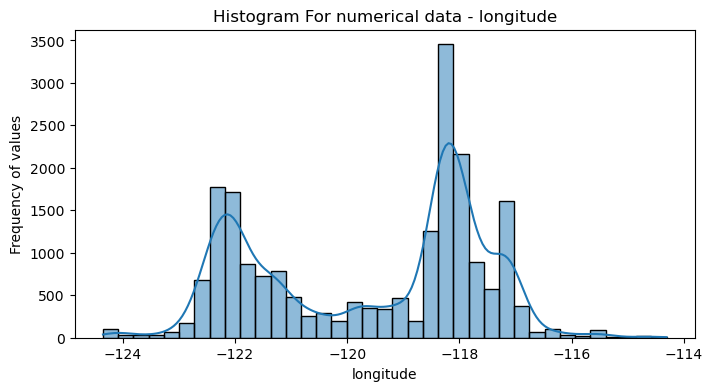

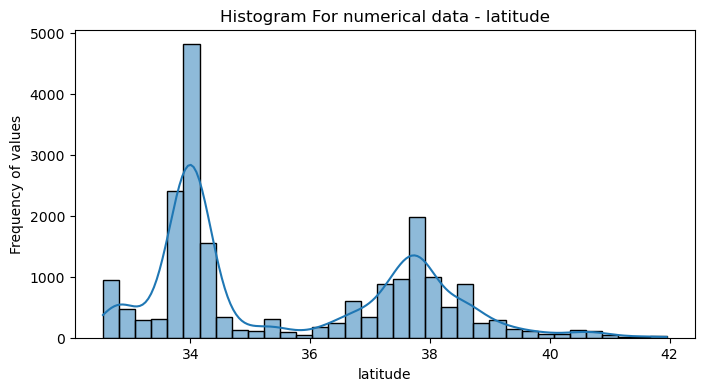

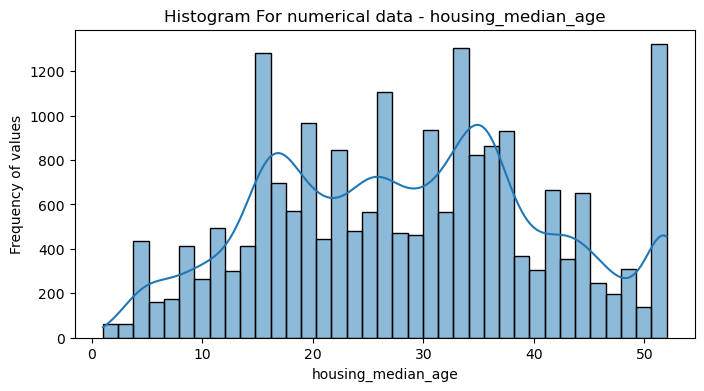

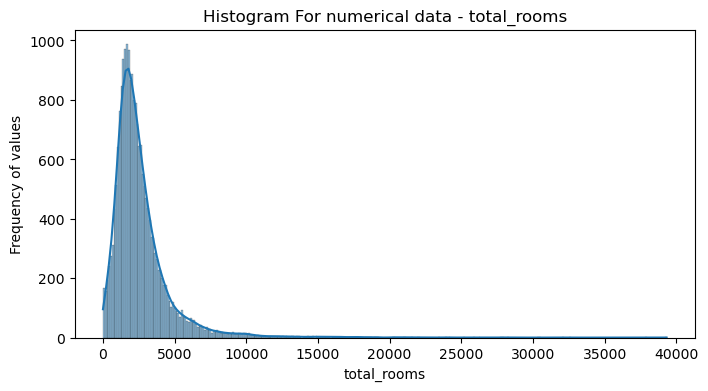

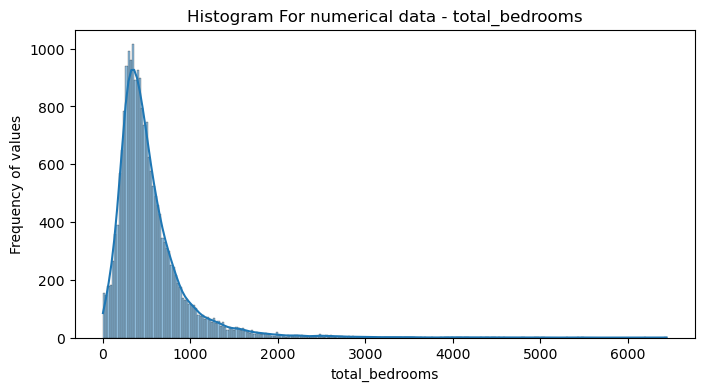

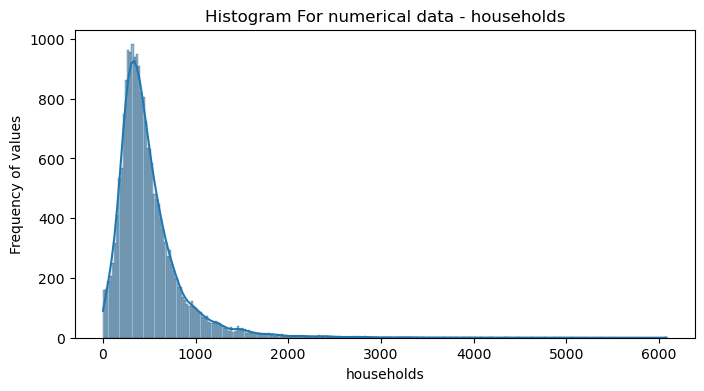

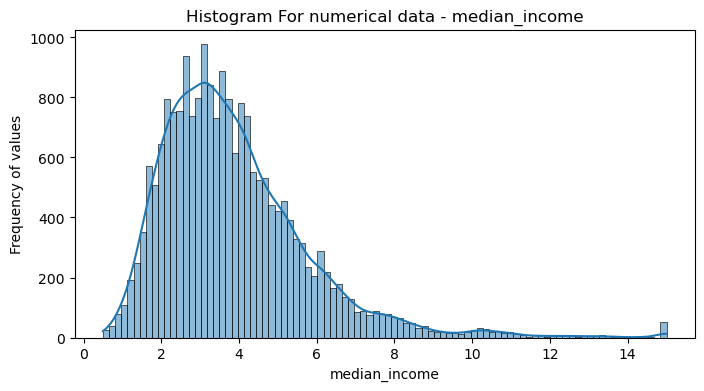

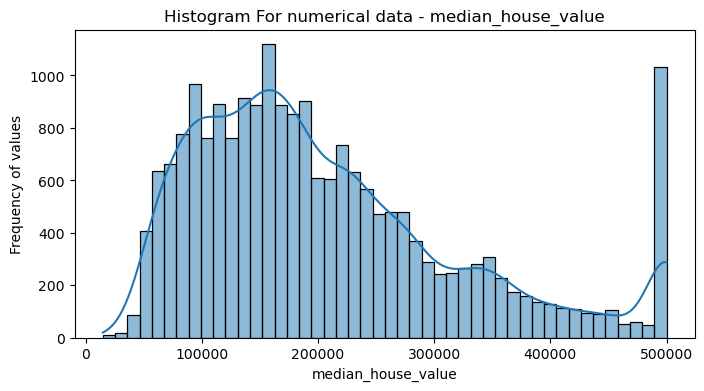

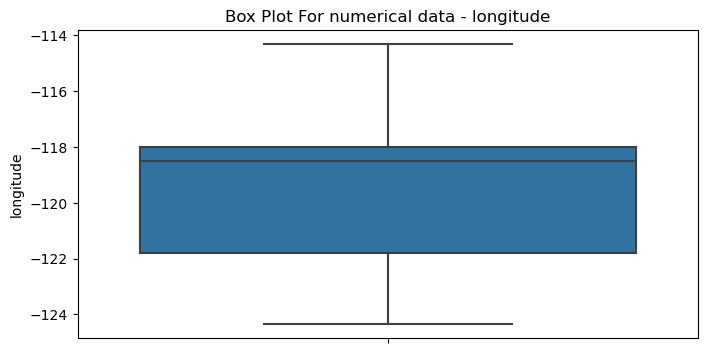

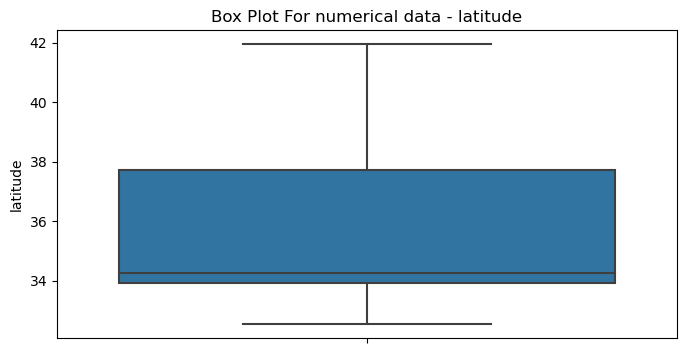

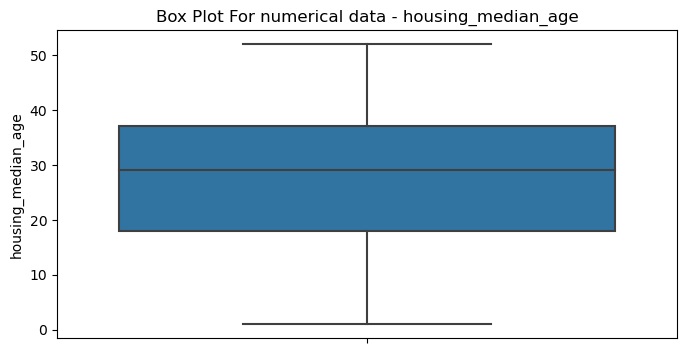

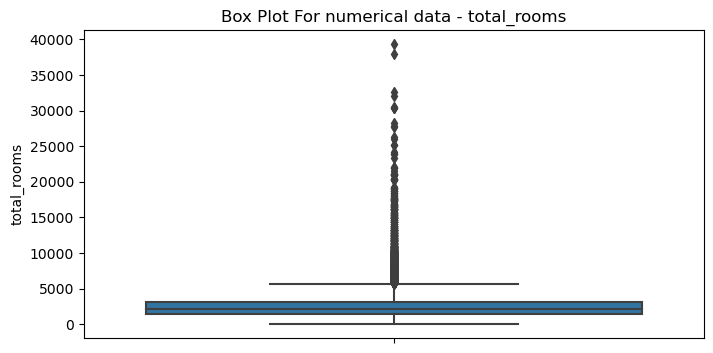

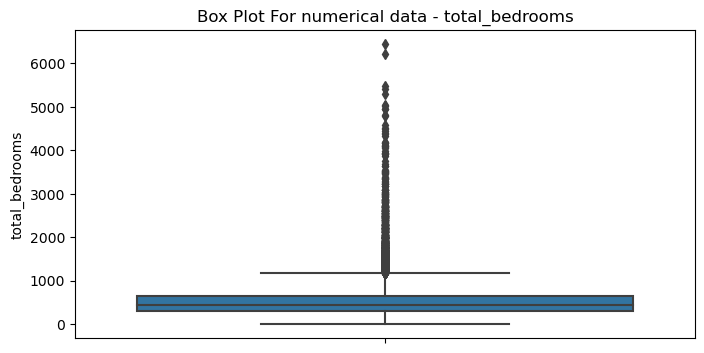

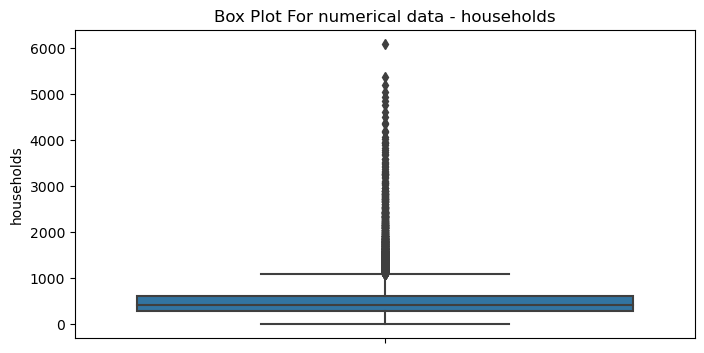

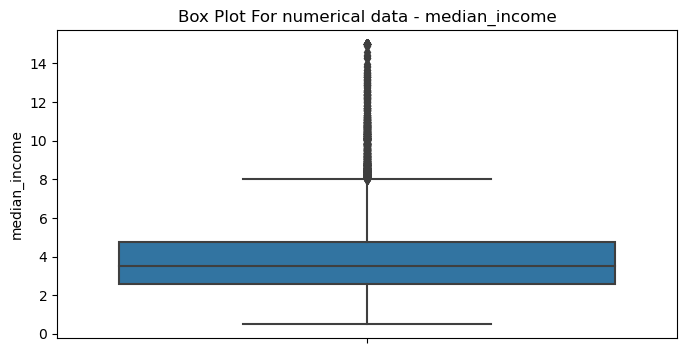

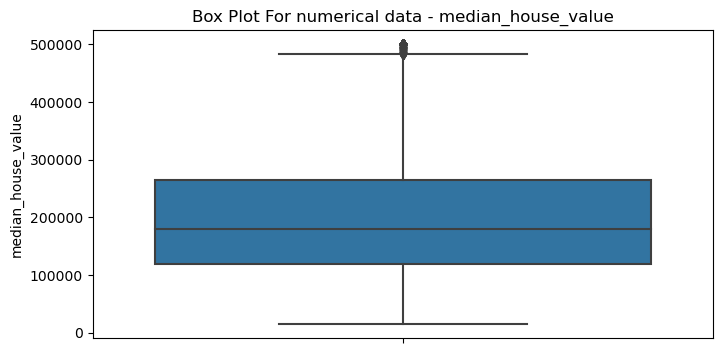

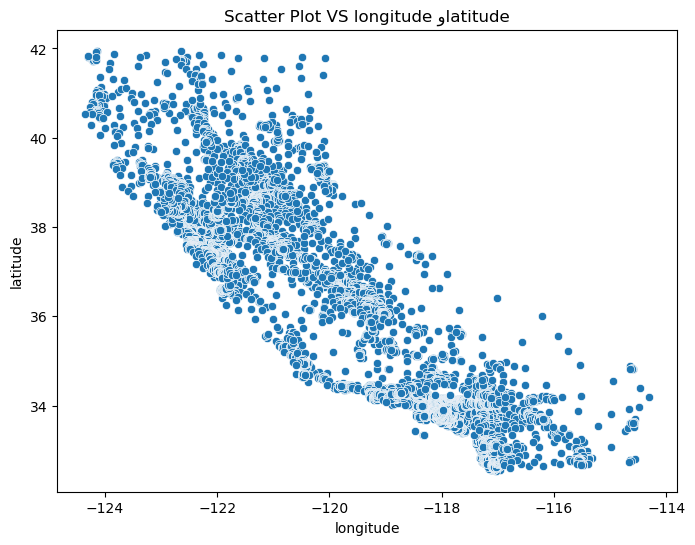

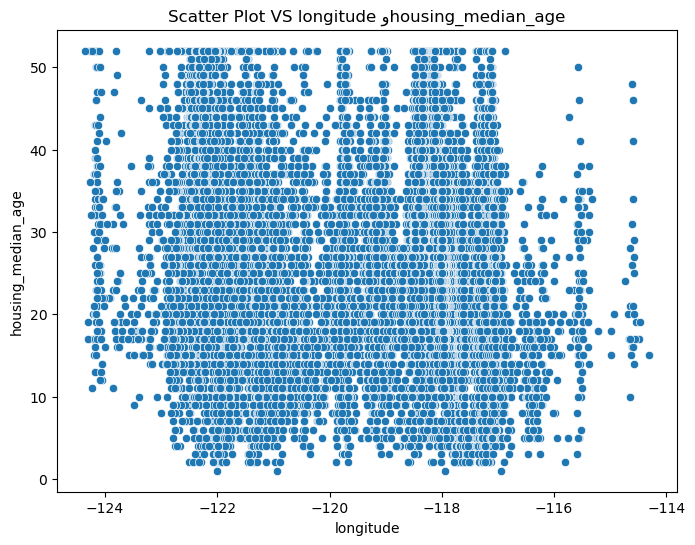

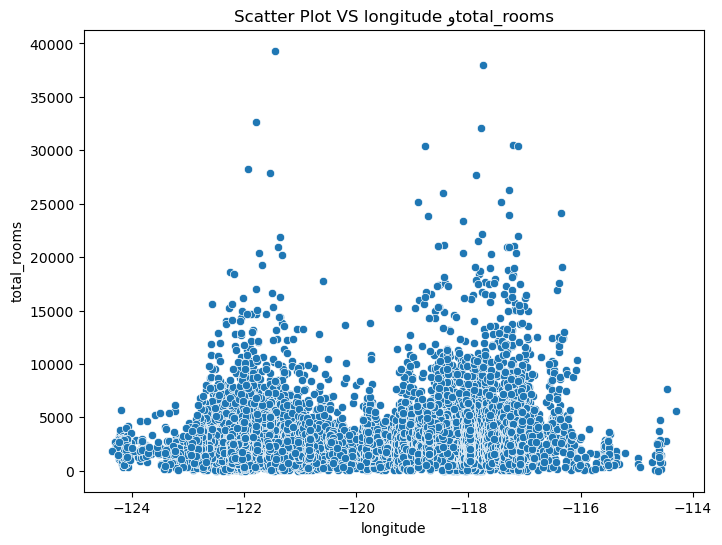

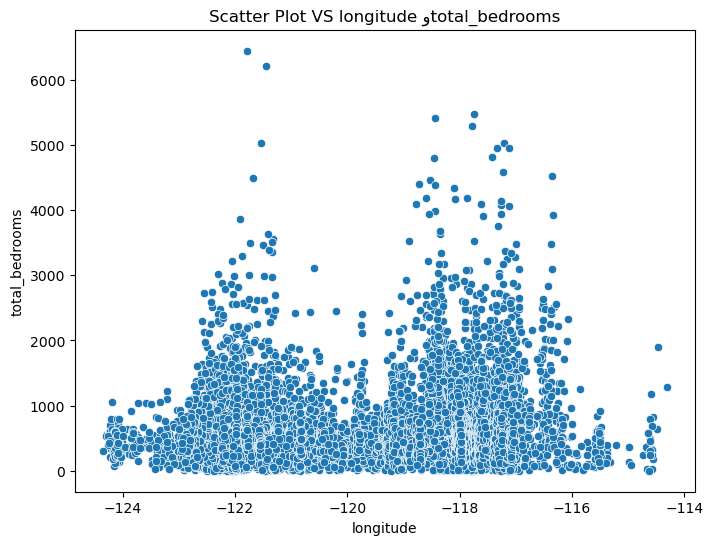

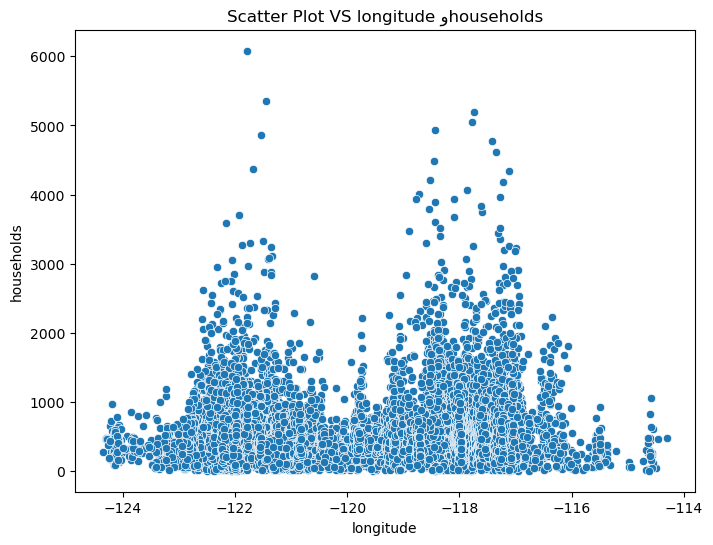

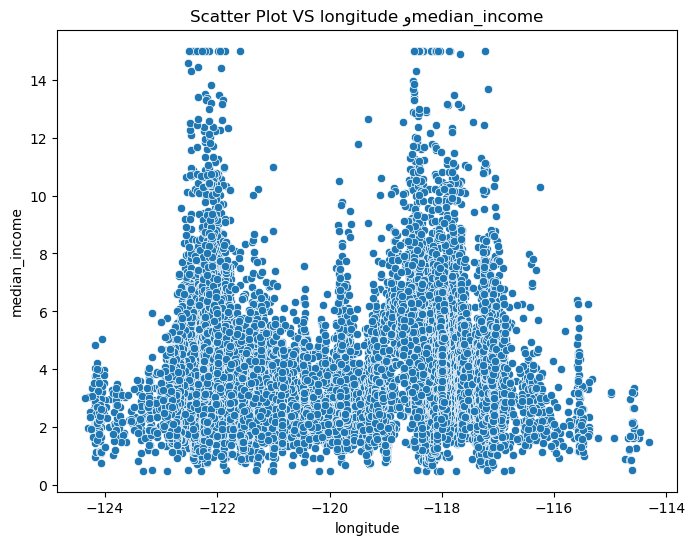

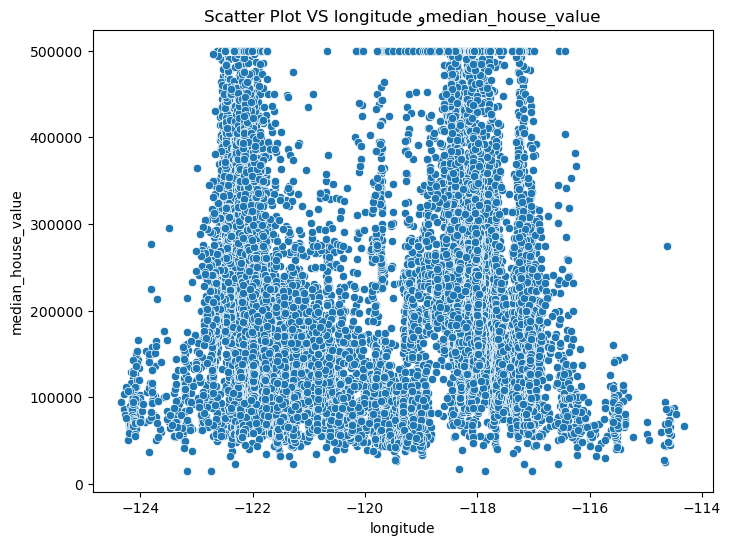

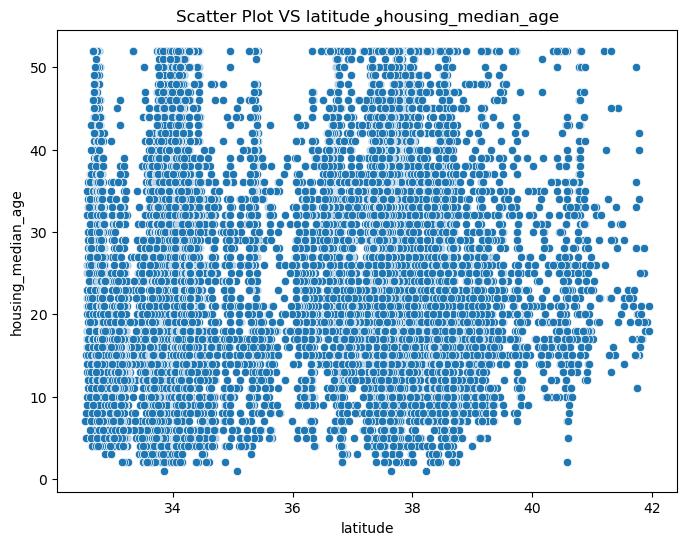

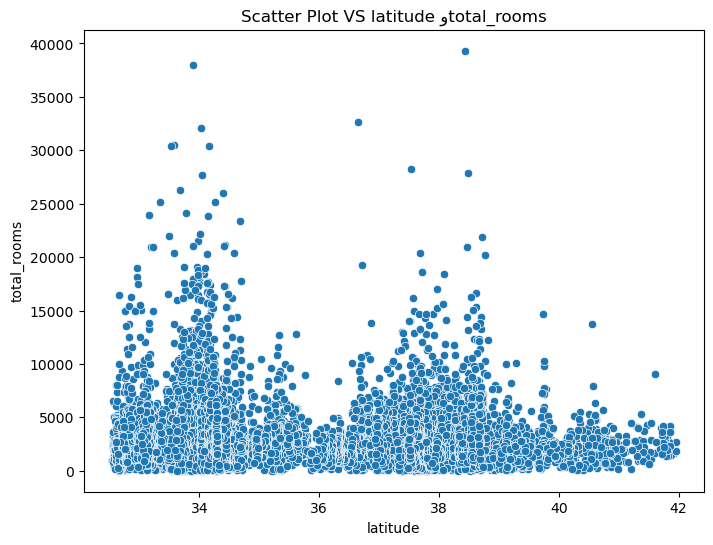

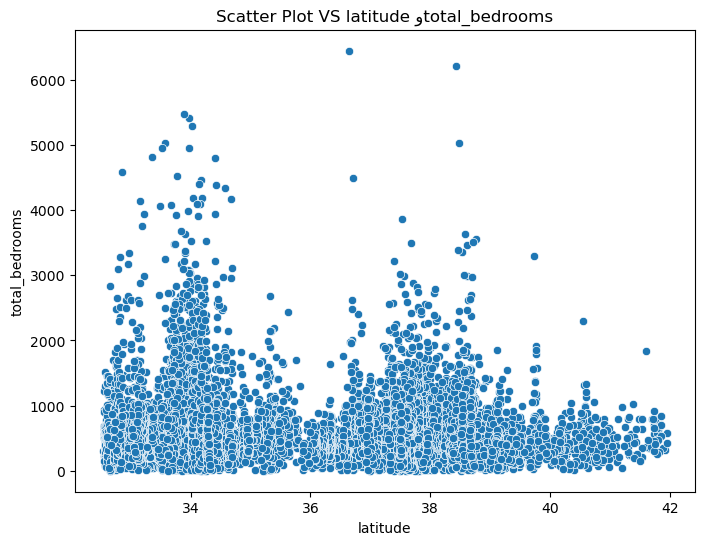

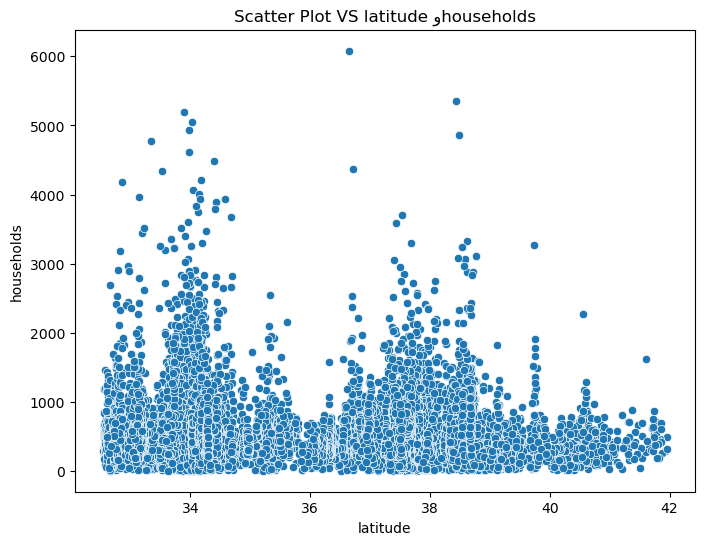

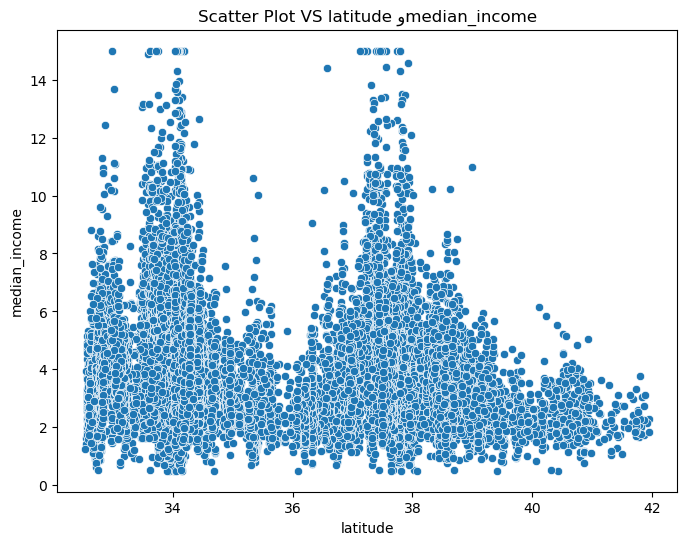

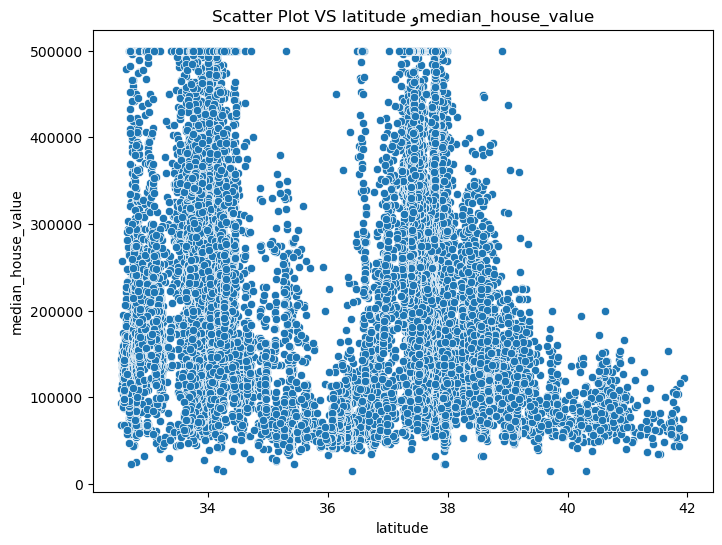

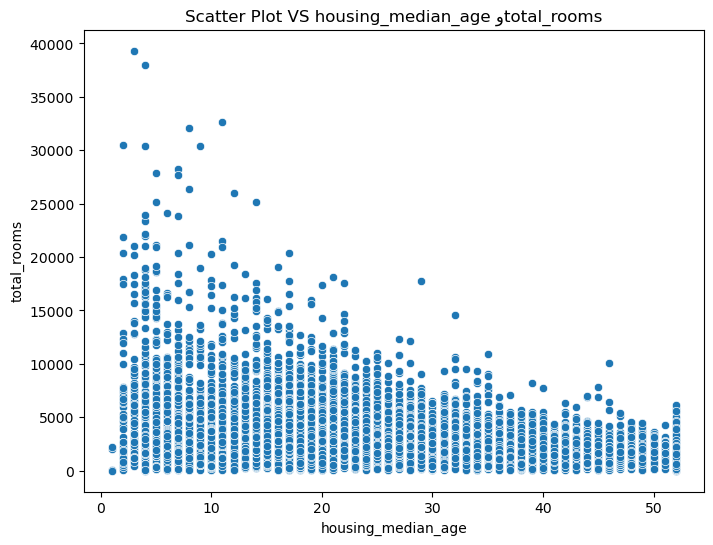

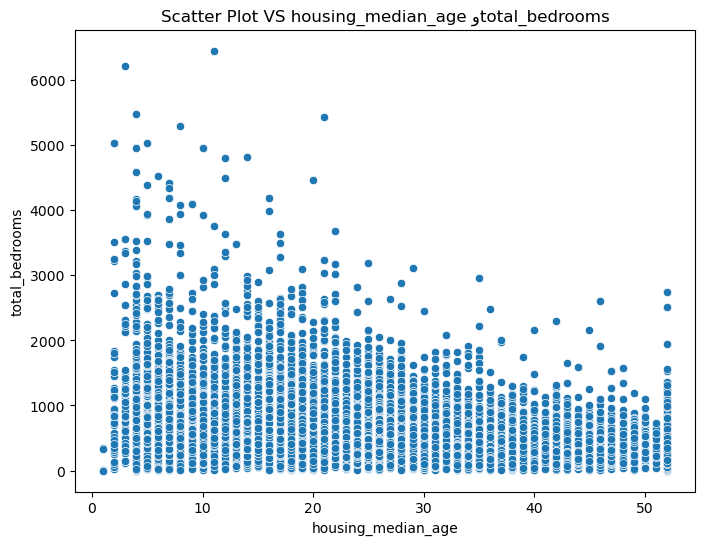

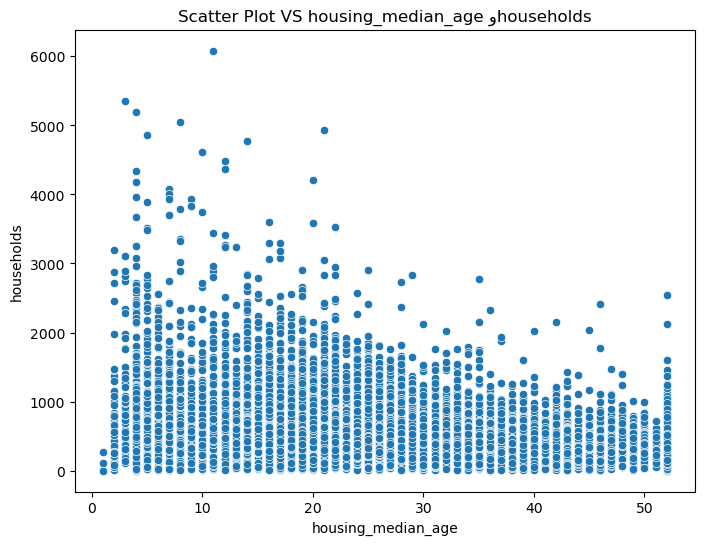

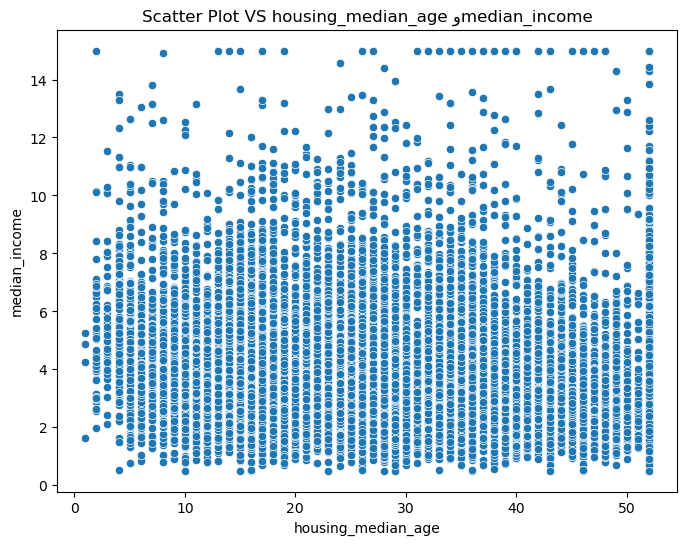

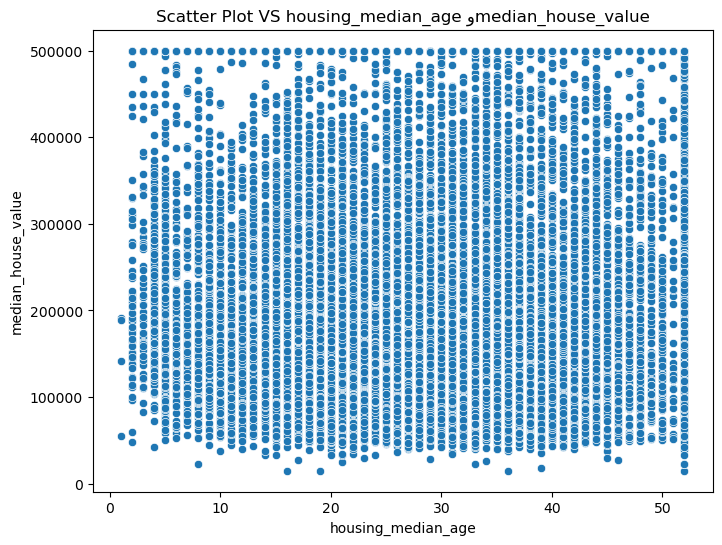

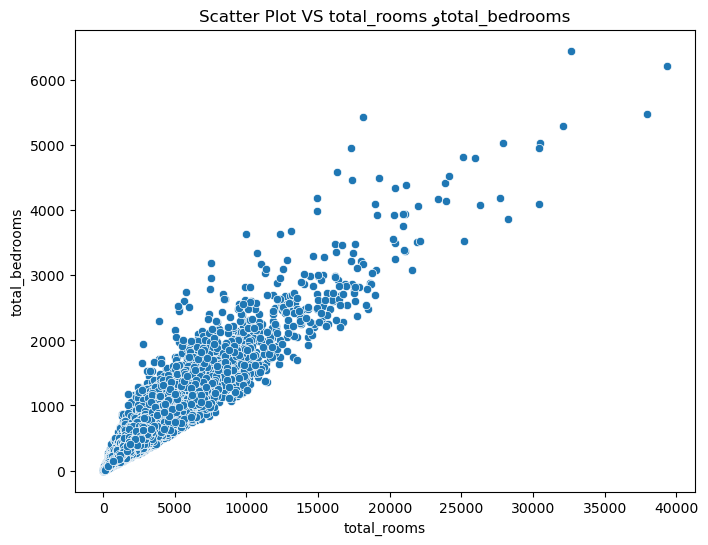

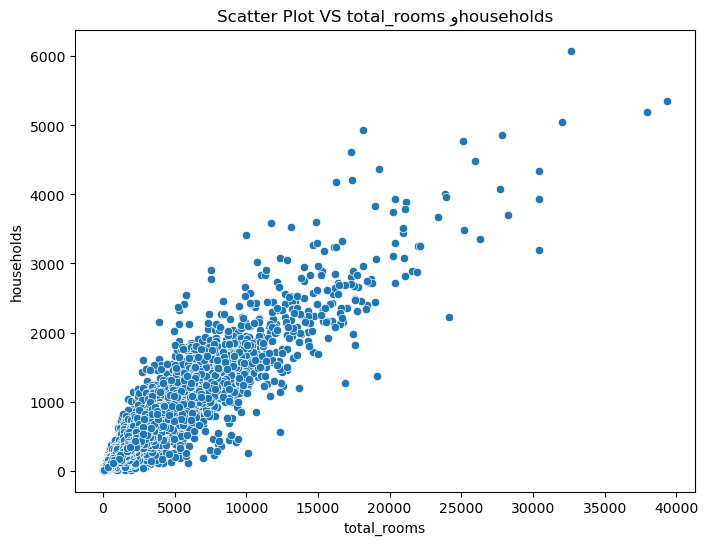

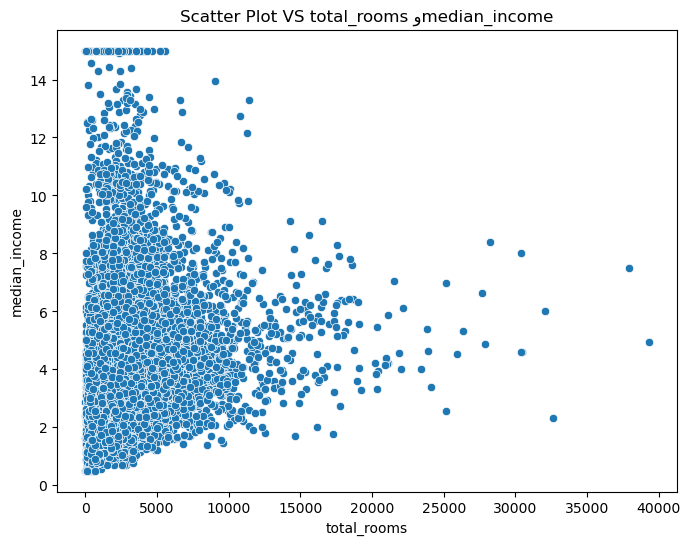

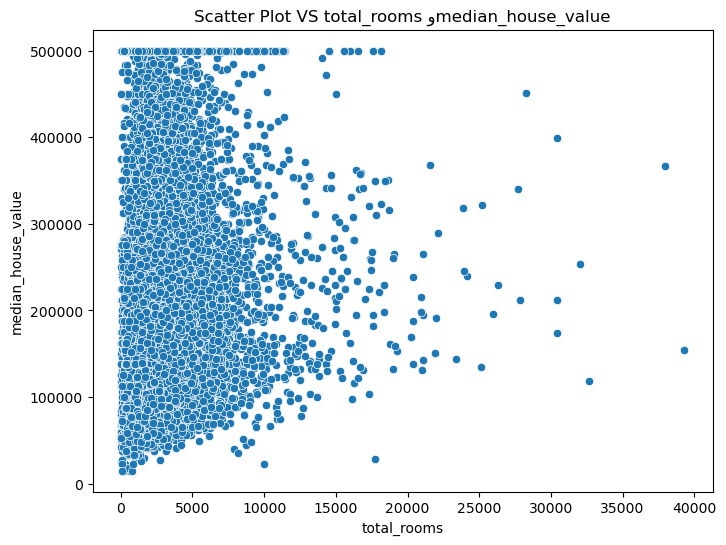

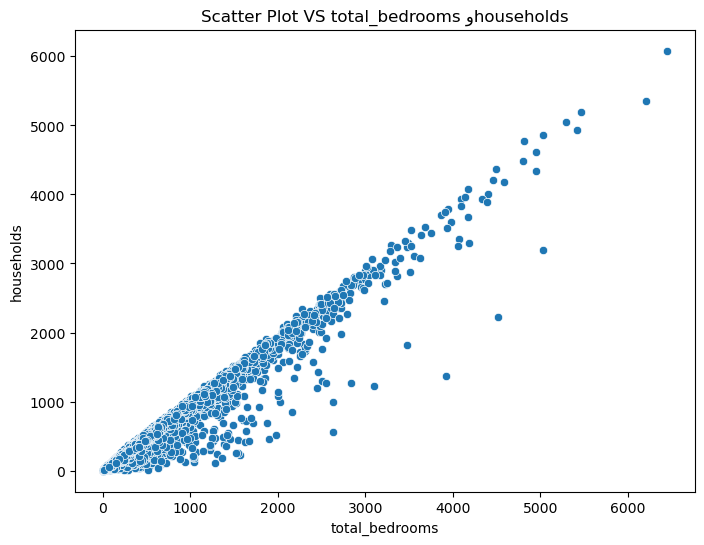

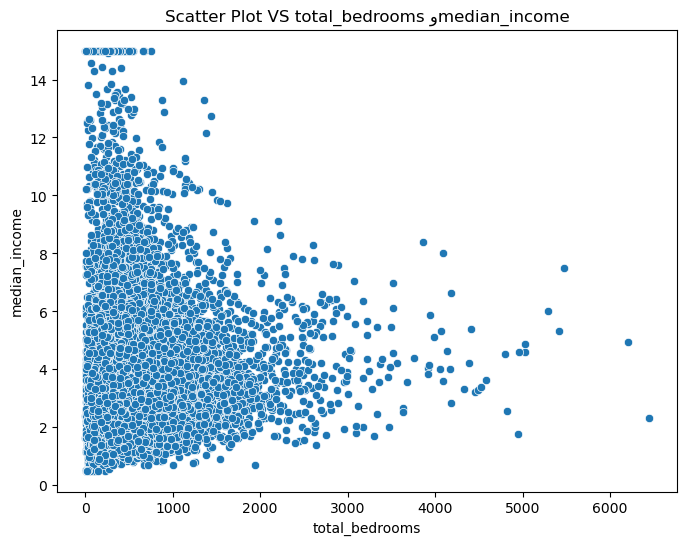

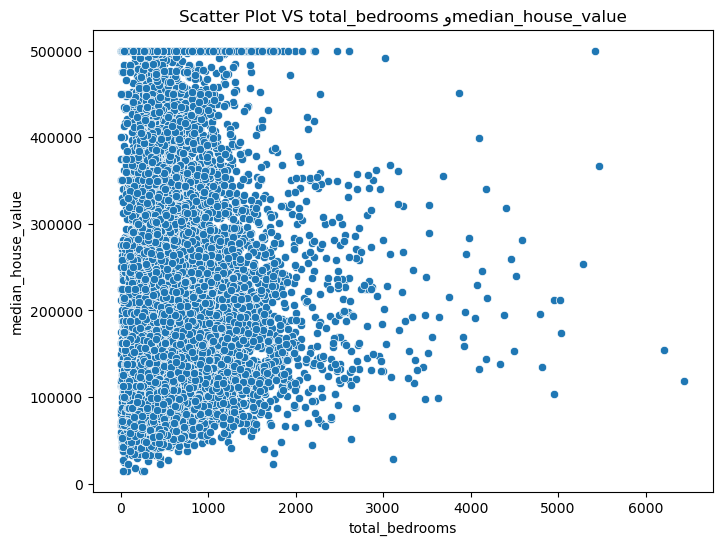

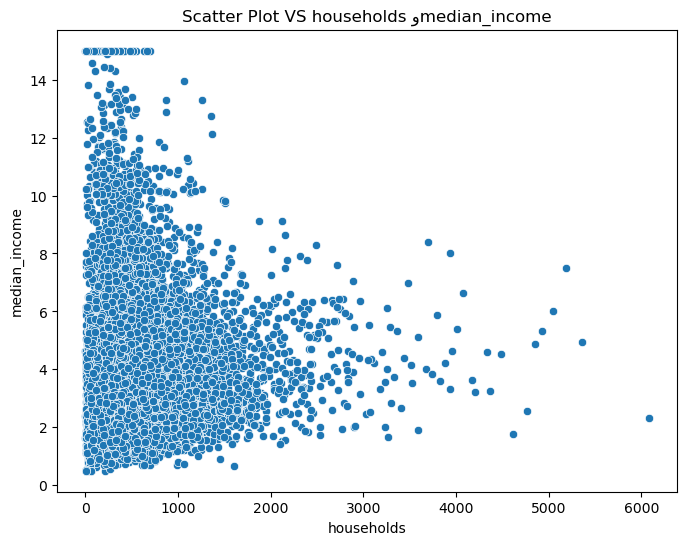

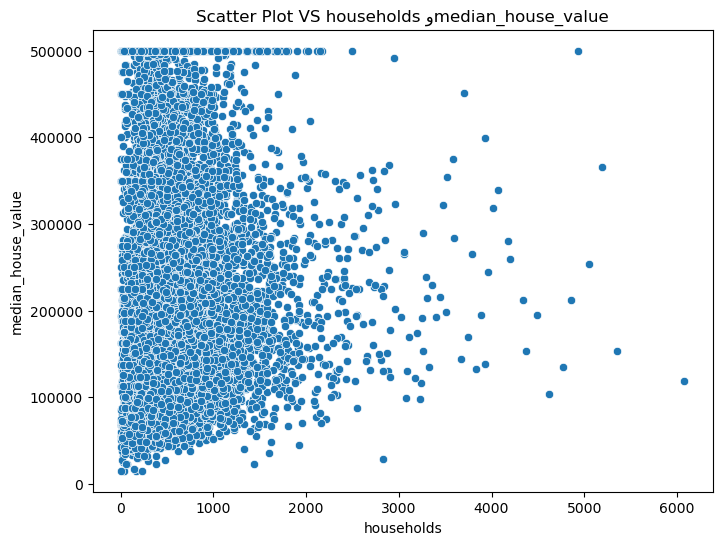

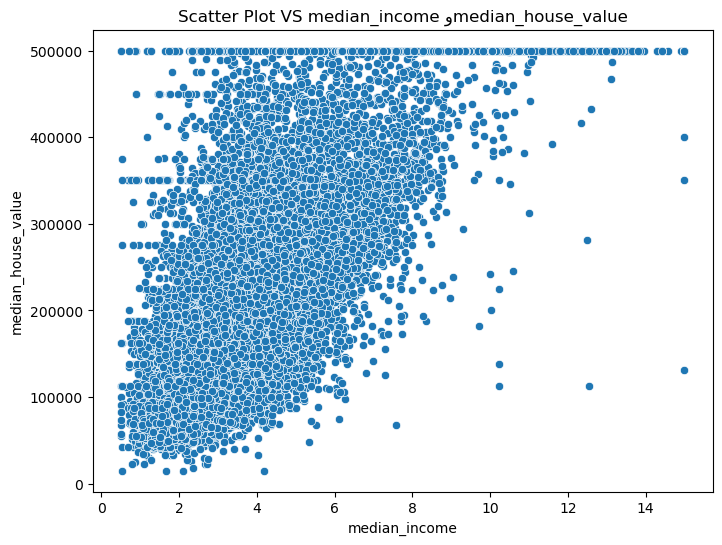

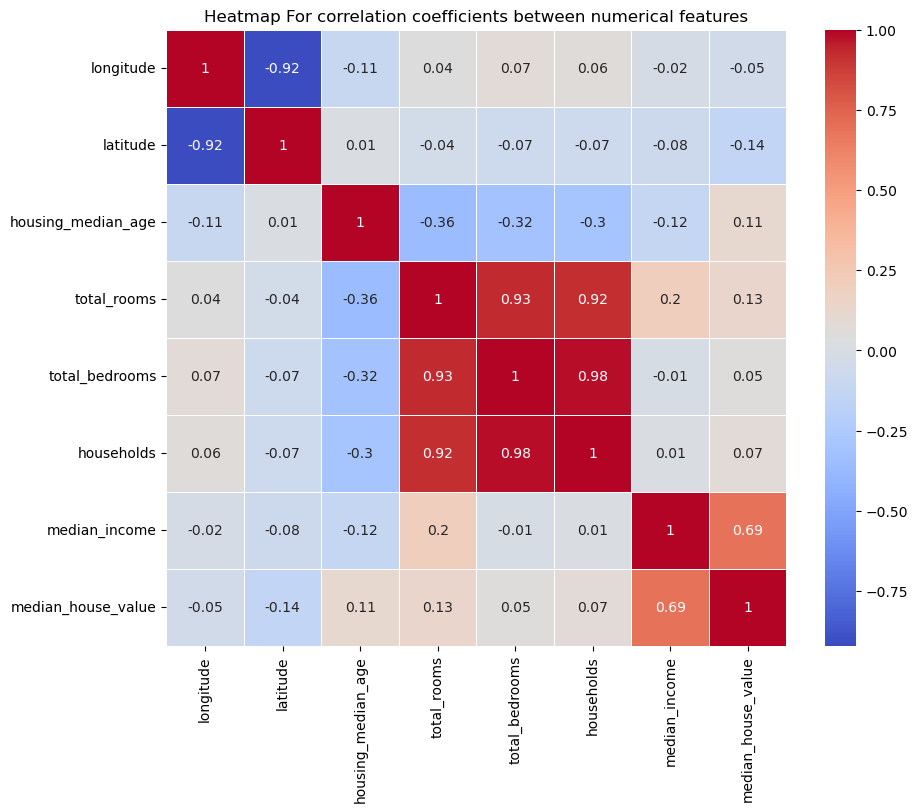

In [40]:
##8.Calling functions to draw visualizations
# استدعاء الدوال لرسم التصورات
plot_histograms(dataset)  # رسم histograms
plot_box_plots(dataset)  # رسم box plots
plot_scatter_plots(dataset)  # رسم scatter plots
plot_correlation_heatmap(dataset)   # رسم Heatmap لمعاملات الارتباط


In [41]:
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Seventh stage: Data processing
print('\n')
print('Seventh stage: Data processing.')
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>




Seventh stage: Data processing.


In [42]:
print('\n')
print('1. Handling missing values')
print('\n')
## 1. Handling missing values
handle_missing_values(dataset)  # فحص ومعالجة القيم المفقودة

# فحص القيم المفقودة في مجموعة البيانات
missing_values = check_missing_values(dataset)
print('\n')
missing_values





1. Handling missing values


Missing values found in column 'total_bedrooms'.
column 'total_bedrooms' (float64)
How would you like to address this column? (default proposal : Use (median))
1. Use average
2. Use median
3. Use common value (mode)
Choose the option number: 2




{'longitude': 0,
 'latitude': 0,
 'housing_median_age': 0,
 'total_rooms': 0,
 'total_bedrooms': 0,
 'households': 0,
 'median_income': 0,
 'median_house_value': 0,
 'ocean_proximity': 0}

In [43]:
print('2.LabelCoding categorical data')

# العثور على الأعمدة من نوع 'object'
object_columns = dataset.select_dtypes(include=['object']).columns

if not object_columns.empty:
    print("Column names of type 'object' that can be encodedا:")
    for col in object_columns:
        print(col)
else:
    print("There are no columns of type 'object' in the data set.")


2.LabelCoding categorical data
Column names of type 'object' that can be encodedا:
ocean_proximity


In [44]:
# العثور على الأعمدة من نوع 'object'
object_columns = dataset.select_dtypes(include=['object']).columns

if not object_columns.empty:
    print("Column names of type 'object' that can be encoded:")
    for col in object_columns:
        print(col)
    
    # استدعاء الدالة get_selected_features_from_user() فقط إذا كانت هناك أعمدة من نوع 'object'
    selected_features = get_selected_features_from_user()
    
    # التحقق من وجود متغيرات محددة
    if not selected_features:
        encoded_data = dataset
        print("No variables specified. No variables of categorical type have been specified to be encoded.")
        print('\n')
    else:
        # السماح للمستخدم بإدخال نوع الترميز
        while True:
            encoding_type = input("Enter encoding type ('label' or 'one-hot'): ")

            # التحقق من صحة نوع الترميز المدخل
            if encoding_type in ['label', 'one-hot']:
                break
            else:
                print("Invalid encoding type. Please enter 'label' or 'one-hot'.")

        # استخدام الدالة لترميز البيانات باستخدام نوع الترميز المحدد
        encoded_data = encode_selected_features(dataset, selected_features, encoding_type)
        print("Encoding process: The specified variables were successfully encoded.")
else:
    print("There are no columns of type 'object' in the data set.")
    encoded_data = dataset


Column names of type 'object' that can be encoded:
ocean_proximity
ادخل اسم المتغير (اضغط Enter للإنهاء): ocean_proximity
ادخل اسم المتغير (اضغط Enter للإنهاء): 
Enter encoding type ('label' or 'one-hot'): label
Encoding process: The specified variables were successfully encoded.


In [45]:
encoded_data 

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       households  median_income  median_house_value  ocean_proximity  
0           126.0         8.3252            452600.0                3  
1          1138.0         8.3014            358500.0                3  
2           177.0         7.2574            352100.0                3  
3           219.0         5.6431            341300.0                3  
4           259.0         3.8462            342200.0                3  
...           ...            ...                 ...              ...  
20635       330.0         1.5603             78100.0                1  
20636       114.0         2.5568             77100.0                1  
20637       433.0         1.7000             92300.0                1  
20638       349.0         1.8672             84700.0                1  
20639       530.0         2.3886             89400.0                1  

[20640 rows x 9 columns]

In [46]:
# 3. Examining and treating outliers in numerical data
# السماح للمستخدم بتحديد ما إذا كان يرغب في معالجة القيم المتطرفة
print('\n')
print('3. Examining and treating outliers in numerical data')
print('\n')
selected_features = encoded_data.columns  # اختيار جميع الأعمدة
process_outliers = input("Do you want to handle outliers? (yes/no): ").strip().lower()

if process_outliers == 'yes':
    outlier_strategy = input("Choose a strategy for handling outliers (clip/replace/std): ")
    # تنفيذ المعالجة باستخدام الاستراتيجية المحددة
    data_numeric_no_outliers = handle_outliers_iqr(encoded_data[selected_features], outlier_strategy=outlier_strategy)
    print("Processing process, Outlier data was processed successfully.")
else:
    data_numeric_no_outliers = encoded_data[selected_features]
    print("No outlier processing performed.")




3. Examining and treating outliers in numerical data


Do you want to handle outliers? (yes/no): yes
Choose a strategy for handling outliers (clip/replace/std): clip
Processing process, Outlier data was processed successfully.


In [47]:
data_numeric_no_outliers

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0      880.000           129.0   
1        -122.22     37.86                21.0     5698.375          1106.0   
2        -122.24     37.85                52.0     1467.000           190.0   
3        -122.25     37.85                52.0     1274.000           235.0   
4        -122.25     37.85                52.0     1627.000           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0     1665.000           374.0   
20636    -121.21     39.49                18.0      697.000           150.0   
20637    -121.22     39.43                17.0     2254.000           485.0   
20638    -121.32     39.43                18.0     1860.000           409.0   
20639    -121.24     39.37                16.0     2785.000           616.0   

       households  median_income  median_house_value  ocean_proximity  
0           126.0       8.013025            452600.0              2.5  
1          1092.5       8.013025            358500.0              2.5  
2           177.0       7.257400            352100.0              2.5  
3           219.0       5.643100            341300.0              2.5  
4           259.0       3.846200            342200.0              2.5  
...           ...            ...                 ...              ...  
20635       330.0       1.560300             78100.0              1.0  
20636       114.0       2.556800             77100.0              1.0  
20637       433.0       1.700000             92300.0              1.0  
20638       349.0       1.867200             84700.0              1.0  
20639       530.0       2.388600             89400.0              1.0  

[20640 rows x 9 columns]

In [48]:
#4. transformation for numerical data

# السماح للمستخدم بتحديد ما إذا كان يرغب في تنفيذ التحويل (transformation) على البيانات
perform_transformation = input("Do you want to perform data transformation? (yes/no): ").strip().lower()

if perform_transformation == 'yes':
    transf_data = data_numeric_no_outliers.copy()
    
    target_column = select_columns_target(transf_data)
    print("The column to be predicted:", target_column)
    print('\n')
    transf_data.drop(columns=target_column, inplace=True)
    
    # طلب من المستخدم اختيار نوع التحويل
    while True:
        try:
            transformation_type = input("Choose the transformation type data (std/min_max/normalize): ").strip().lower()
            if transformation_type not in ["std", "min_max", "normalize"]:
                raise ValueError("Invalid transformation type. Please choose from 'std', 'min_max', or 'normalize'.")
            break  # إذا كان الإدخال صحيحًا، انهي الحلقة
        except ValueError as e:
            print(f"Error: {e}")
            print("Please try again.")
    
    # تطبيق التحويل المحدد بواسطة المستخدم
    transformed_data = apply_transformation(transf_data, transformation_type)
    print("\n","Processing process, apply transformation data was processed successfully.")
    
    #  إعادة إضافة العمود المستهدف إلى مجموعة البيانات
    temp_target = data_numeric_no_outliers[target_column]
    transformed_data[target_column] = temp_target
else:
    transformed_data = data_numeric_no_outliers
    print("No data transformation performed.")


Do you want to perform data transformation? (yes/no): yes
Enter the name of the column you want to predict: median_house_value
The column to be predicted: median_house_value


Choose the transformation type data (std/min_max/normalize): normalize

 Processing process, apply transformation data was processed successfully.


In [49]:
# عرض البيانات المحولة
print("transformation data:")
transformed_data


transformation data:


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0      -1.327803  1.052523            0.982119    -1.117258       -1.309884   
1      -1.322812  1.043159           -0.607004     2.329880        2.128639   
2      -1.332794  1.038478            1.856137    -0.697310       -1.095196   
3      -1.337785  1.038478            1.856137    -0.835385       -0.936820   
4      -1.337785  1.038478            1.856137    -0.582843       -0.778444   
...          ...       ...                 ...          ...             ...   
20635  -0.758808  1.801603           -0.289180    -0.555657       -0.447614   
20636  -0.818702  1.806285           -0.845373    -1.248179       -1.235975   
20637  -0.823693  1.778194           -0.924829    -0.134278       -0.056952   
20638  -0.873605  1.778194           -0.845373    -0.416152       -0.324432   
20639  -0.833676  1.750104           -1.004285     0.245607        0.404098   

       households  median_income  ocean_proximity  median_house_value  
0       -1.291941       2.540944         1.602587            452600.0  
1        2.348257       2.540944         1.602587            358500.0  
2       -1.099856       2.085105         1.602587            352100.0  
3       -0.941669       1.111261         1.602587            341300.0  
4       -0.791014       0.027262         1.602587            342200.0  
...           ...            ...              ...                 ...  
20635   -0.523601      -1.351732         0.083835             78100.0  
20636   -1.337138      -0.750583         0.083835             77100.0  
20637   -0.135665      -1.267457         0.083835             92300.0  
20638   -0.452040      -1.166592         0.083835             84700.0  
20639    0.229673      -0.852051         0.083835             89400.0  

[20640 rows x 9 columns]

In [50]:
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Ninth stage: training the model and evaluating the model
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

from pycaret.classification import *
from pycaret.classification import *


In [51]:

# استخدام الدالة للحصول على معلومات العمود الهدف
target_column, target_data_type, task_type = get_target_info(transformed_data)

# طباعة المعلومات
print(f"Target column: '{target_column}'")
print(f"Data type: '{target_data_type}'")
print(f"Task type: '{task_type}'")


Enter the name of the target column: median_house_value
Target column: 'median_house_value',  Data type: 'numeric', Task type: 'regression'. Confirm? (yes/no): yes
Target column: 'median_house_value'
Data type: 'numeric'
Task type: 'regression'


In [52]:

# تحديد نوع المهمة بناءً على نوع البيانات
if target_data_type.lower() == 'numeric':
    task_type_by_data = 'regression'
    if task_type.lower() == 'regression':
        from pycaret.regression import *
        s = setup(transformed_data, target = target_column, session_id = 123)
    else:
        print("Task does not match data type (regression).")
else:
    task_type_by_data = 'classification'
    if task_type.lower() == 'classification':
        setup_func = setup
        from pycaret.classification import *
        s = setup(transformed_data, target = target_column, session_id = 123)
    else:
        print("Task does not match data type (classification).")




In [53]:
if task_type_by_data:
    exp1=s
    # تحليل البيانات وتحديد الخوارزمية الأفضل
    print('\n')
    print('Comparison of machine learning models')
    best_model = compare_models()




Comparison of machine learning models


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [54]:
print('\n')
print('best_model',best_model)



best_model LGBMRegressor(n_jobs=-1, random_state=123)


In [55]:

print('\n')
print('evaluate best_model')
print(evaluate_model(best_model))




evaluate best_model


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

None


In [56]:
print('\n')
print('Comparing predicted values and actual values by the best model')
print(predict_model(best_model))



Comparing predicted values and actual values by the best model


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
19121  -1.532442  1.221066            0.902663    -0.334594       -0.320913   
20019   0.259394  0.214489           -1.560478     0.611900        0.235164   
15104   1.292570 -1.302399           -1.322110     0.807208        0.745487   
3720    0.573839 -0.670362           -0.130267     0.543220        1.649991   
8938    0.548883 -0.759315            0.982119     0.187659        0.196450   
...          ...       ...                 ...          ...             ...   
1859   -2.281120  2.957996           -0.607004     0.181935        0.270358   
10867   0.843363 -0.904450           -0.924829     1.917532        2.327929   
4693    0.598795 -0.731225            1.856137    -0.170764       -0.225887   
3521    0.538901 -0.637590            0.346470     0.433046        0.090865   
12364   1.552111 -0.848269           -1.798846     1.732240        1.474017   

       households  median_income  ocean_proximity  

In [57]:
predictions = predict_model(best_model, data=transformed_data)
predictions.head()


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327803  1.052523            0.982119    -1.117258       -1.309884   
1  -1.322812  1.043159           -0.607004     2.329880        2.128639   
2  -1.332794  1.038478            1.856137    -0.697310       -1.095196   
3  -1.337785  1.038478            1.856137    -0.835385       -0.936820   
4  -1.337785  1.038478            1.856137    -0.582843       -0.778444   

   households  median_income  ocean_proximity  median_house_value  \
0   -1.291941       2.540944         1.602587            452600.0   
1    2.348257       2.540944         1.602587            358500.0   
2   -1.099856       2.085105         1.602587            352100.0   
3   -0.941669       1.111261         1.602587            341300.0   
4   -0.791014       0.027262         1.602587            342200.0   

   prediction_label  
0     422559.397894  
1     429727.258200  
2     400306.969617  
3     329730.358538  
4     268906.558061

In [58]:
save_model(best_model, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['longitude', 'latitude',
                                              'housing_median_age',
                                              'total_rooms', 'total_bedrooms',
                                              'households', 'median_income',
                                              'ocean_proximity'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model', LGBMRegressor(n_jobs=-1, random_state=123))]),
 'my_best_pipeline.pkl')

In [59]:
loaded_model = load_model('my_best_pipeline')

Transformation Pipeline and Model Successfully Loaded
